In [3]:
import os
import numpy as np
import pandas as pd
import openpyxl as pyxl
import matplotlib.pyplot as plt

In [4]:
# Obtener la ruta del directorio actual 
ruta = os.getcwd()
print(ruta)

C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP3


In [5]:
# Importación de bases de datos. Las rutas de acceso que se leen en el output de esta celda deben ser modificadas de acuerdo al directorio propio.
db05_raw = pd.read_stata(r"C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP2\usu_individual_T105.dta")
db25_raw = pd.read_excel(r"C:\Users\franc\Documents\Facultad\Big Data y Machine Learning\TPs\TP2\usu_individual_T125.xlsx")

# Recortamos los datasets
db05 = db05_raw[db05_raw["region"] == "NEA"].copy()
db25 = db25_raw[db25_raw["REGION"] == 41].copy()

In [6]:
#Para el proceso de elección de variables, empezamos descartando aquellas variables que figuren sólo en uno de ambos Datasets.
#Evaluamos cuáles son:
db05.columns = db05.columns.str.upper()
cols05 = list(db05.columns.str.upper())
cols25 = list(db25.columns)

In [7]:
cols05_filtro = []
cols05_descarte = []

for col in cols05:
    if col in cols25:
        cols05_filtro.append(col)
    else:
        cols05_descarte.append(col)

print(cols05_filtro)
print()
print(cols05_descarte)

['CODUSU', 'NRO_HOGAR', 'COMPONENTE', 'H15', 'ANO4', 'TRIMESTRE', 'REGION', 'MAS_500', 'AGLOMERADO', 'PONDERA', 'CH03', 'CH04', 'CH06', 'CH07', 'CH08', 'CH09', 'CH10', 'CH11', 'CH12', 'CH13', 'CH14', 'CH15', 'CH15_COD', 'CH16', 'CH16_COD', 'NIVEL_ED', 'ESTADO', 'CAT_OCUP', 'CAT_INAC', 'PP02C1', 'PP02C2', 'PP02C3', 'PP02C4', 'PP02C5', 'PP02C6', 'PP02C7', 'PP02C8', 'PP02E', 'PP02H', 'PP02I', 'PP03C', 'PP03D', 'PP3E_TOT', 'PP3F_TOT', 'PP03G', 'PP03H', 'PP03I', 'PP03J', 'INTENSI', 'PP04A', 'PP04B_COD', 'PP04B1', 'PP04B2', 'PP04B3_MES', 'PP04B3_ANO', 'PP04B3_DIA', 'PP04C', 'PP04C99', 'PP04D_COD', 'PP04G', 'PP05B2_MES', 'PP05B2_ANO', 'PP05B2_DIA', 'PP05C_1', 'PP05C_2', 'PP05C_3', 'PP05E', 'PP05F', 'PP05H', 'PP06A', 'PP06C', 'PP06D', 'PP06E', 'PP06H', 'PP07A', 'PP07C', 'PP07D', 'PP07E', 'PP07F1', 'PP07F2', 'PP07F3', 'PP07F4', 'PP07F5', 'PP07G1', 'PP07G2', 'PP07G3', 'PP07G4', 'PP07G_59', 'PP07H', 'PP07I', 'PP07J', 'PP07K', 'PP08D1', 'PP08D4', 'PP08F1', 'PP08F2', 'PP08J1', 'PP08J2', 'PP08J3', '

In [8]:
cols25_nuevas = []
cols25_viejas = []
for col in cols25:
    if col not in cols05:
        cols25_nuevas.append(col)
    else:
        cols25_viejas.append(col)

In [9]:
# Ahora recortamos ambos datasets para quedarnos sólo con las columnas compartidas entre ambos
db05_new = db05[cols05_filtro]
db25_new = db25[cols25_viejas]

In [10]:
dbconcat = pd.concat([db05_new,db25_new])
dbconcat.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10199 entries, 18832 to 45413
Columns: 168 entries, CODUSU to ADECCFR
dtypes: float64(42), object(126)
memory usage: 13.2+ MB


### Limpieza de datos

Ahora, procedemos a hacer el recorte de variables.

De antemano, tenemos las siguientes 8 variables como obligatorias:
- CH03: Parentesco
- CH04: Sexo
- CH06: Edad
- CH07: Estado civil
- CH08: Cobertura médica
- NIVEL_ED: Nivel educativo
- CH12: Nivel educativo cursado más alto
- CH13: (No) Finalización del Nivel educativo cursado más alto
- CH14: Último año educativo aprobado
- ESTADO: Condición de actividad laboral
- CAT_INAC: Categoría de inactividad  
- IPCF: Monto de ingreso per cápita familiar
- ITF: ingreso total familiar
- PP3E_TOT: Total de horas que trabajó en la semana en la ocupación principal
- PP3F_TOT: Total de horas que trabajó en la semana en otras ocupaciones
<br><br>
Nuestras variables elegidas son:
- CAT_OCUP: Categoría ocupacional
- PP06E: Tipo de constitución jurídica de la actividad de trabajadores independientes
- PP04G: ¿Dónde realiza principalmente sus tareas?
- PP03I: ¿En los últimos 30 días, buscó trabajar más horas?
- PP07K: Documentación asociada al cobro de los asalariados
- P21: Monto de ingreso de la ocupación principal
- T_VI: Monto de ingresos no laborales

In [11]:
# Variables obligatorias:
obligatorias = ['CODUSU','ANO4','CH03','CH04','CH06','CH07','CH08','NIVEL_ED','CH12','CH13','CH14','ESTADO','CAT_INAC','IPCF','ITF','PP3E_TOT','PP3F_TOT'] # conservamos ANO4 y CODUSU por fuera de las 15 a analizar

# Variables elegidas:
elegidas = ['CAT_OCUP','PP06E','PP04G','PP03I','PP07K','P21','T_VI']
recorte = obligatorias + elegidas
#Rechequeamos que las elegidas estén en ambos datasets:
faltantes = []
for col in recorte:
    if col not in db25_new:
        faltantes.append(col)
    else:
        pass

print(faltantes)

[]


In [12]:
db_recorte = dbconcat[recorte]

# Revisamos "incoherencias" en el formato de los datos para corregirlos
for col in db_recorte:
    print(f"{col}: {db_recorte[col].dtype}")

print()

def revision(dataframe):
    cols_mixtas = [] #En esta lista registraremos cuáles son las columnas que contienen más de dtype
    mapeo = {} #Crearemos un diccionario para agilizar el reemplazo de strings por integers o floats 
    
    for col in dataframe:
        if (dataframe[col].dtype in (float,int)) or col in ('ANO4','CODUSU'):
            pass
        else:
            valores_unicos = dataframe[col].unique().tolist()
            cols_mixtas.append(col)
            
            # Crear diccionario anidado: cada valor único como clave con valor vacío (en ese vacío insertaremos el código del Diccionario)
            mapeo[col] = {}
            for valor in valores_unicos:
                if isinstance(valor, (int,float)):
                    pass
                else:
                    mapeo[col][valor] = " "  # o "" para string vacío
            
            print(f"{col}: {valores_unicos}")
    
    print()
    print(f"Columnas tipo 'object': \n{cols_mixtas}")
    print()
    print(f"Datos no numéricos: \n{mapeo}")

revision(db_recorte)

CODUSU: object
ANO4: float64
CH03: object
CH04: object
CH06: object
CH07: object
CH08: object
NIVEL_ED: object
CH12: object
CH13: object
CH14: object
ESTADO: object
CAT_INAC: object
IPCF: float64
ITF: float64
PP3E_TOT: float64
PP3F_TOT: float64
CAT_OCUP: object
PP06E: object
PP04G: object
PP03I: object
PP07K: object
P21: float64
T_VI: float64

CH03: ['Jefe', 'Hijo/Hijastro', 'Yerno/Nuera', 'Nieto', 'Cónyuge/Pareja', 'No familiares', 'Madre/Padre', 'Suegro', 'Hermano', 'Otros familiares', 1, 2, 3, 5, 9, 8, 4, 6, 7, 10]
CH04: ['Mujer', 'Varón', 1, 2]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9.0, 5.0, 2.0, 'Menos de 1 año', 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.

Ahora, reemplazamos todos los registros que estén en formato string por su correspondiente código especificado en el Diccionario de la EPH.

In [13]:
mapeo_reemplazos = {
    'CH03': {
        'Jefe': '1',
        'Hijo/Hijastro': '3',
        'Yerno/Nuera': '4',
        'Nieto': '5',
        'Cónyuge/Pareja': '2',
        'No familiares': '10',
        'Madre/Padre': '6',
        'Suegro': '7',
        'Hermano': '8',
        'Otros familiares': '9',
        
    },
    'CH04': {
        'Mujer': '2',
        'Varón': '1'
    },
    'CH06': {
        'Menos de 1 año': '0',
        '98 y más años': '98'
    },
    'CH07': {
        'Viudo': '4',
        'Unido': '1',
        'Soltero': '5',
        'Casado': '2',
        'Separado o divorciado': '3'
    },
    'CH08': {
        'No paga ni le descuentan': '4',
        'Obra social (incluye PAMI)': '1',
        'Mutual/Prepaga/Servicio de emergencia': '2',
        'Obra social y mutual/prepaga/servicio de emergencia': '12',
        'Ns./Nr.': '9'
    },
    'NIVEL_ED': {
        'Primaria Incompleta (incluye educación especial)': '1',
        'Secundaria Incompleta': '3',
        'Primaria Completa': '2',
        'Sin instrucción': '7',
        'Secundaria Completa': '4',
        'Superior Universitaria Incompleta': '5',
        'Superior Universitaria Completa': '6'
    },
    'CH12': {
        'Primario': '2',
        'Educación especial (discapacitado)': '9',
        'Secundario': '4',
        'EGB': '3',
        'Terciario': '6',
        'Polimodal': '5',
        'Universitario': '7',
        'Jardín/Preescolar': '1',
        'Posgrado Universitario': '8'
    },
    'CH13': {
        'No': '2',
        'Sí': '1'
    },
    'CH14': {
        '05': '5',
        '98': '98',
        '04': '4',
        '07': '7',
        '03': '3',
        '00': '0',
        '  ': np.nan,
        '02': '2',
        '08': '8',
        '06': '6',
        '01': '1',
        '09': '9',
        '99': '98'
    },
    'ESTADO': {
        'Ocupado': '1',
        'Inactivo': '3',
        'Menor de 10 años': '4',
        'Desocupado': '2',
        'Entrevista individual no realizada (no respuesta al cuestion': '0'
    },
    'CAT_INAC': {
        'Ama de casa': '4',
        'Estudiante': '3',
        'Menor de 6 años': '5',
        'Jubilado/pensionado': '1',
        'Otros': '7',
        'Discapacitado': '6',
        'Rentista': '2'
    },
    'CAT_OCUP': {
        'Obrero o empleado': '3',
        'Cuenta propia': '2',
        'Patrón': '1',
        'Trabajador familiar sin remuneración': '4'
    },
    'PP06E': {
        'O es una sociedad convenida de palabra?': '3',
        'Es una sociedad de otra forma legal?': '2',
        'Es una sociedad jurídicamente constituida? (S.A., S.R.L., Co': '1'
    },
    'PP04G': {
        'En otro lugar': '10',
        'En un local/oficina/establecimiento/negocio/taller/chacra/fi': '1',
        'En el domicilio/local de los clientes': '8',
        'En obras en construcción, de infraestructura, minería o simi': '5',
        'En vehículo para transporte de personas y mercaderías-aéreo,': '4',
        'En la calle/espacios públicos/ambulante/de casa en casa/pues': '9',
        'En esta vivienda': '6',
        'En la vivienda del socio o del patrón': '7',
        'En vehículos: bicicleta/moto/auto/barco/bote (no incluye ser': '3',
        'En puesto o kiosco fijo callejero': '2',
        'Ns./Nr.': '0'
    },
    'PP03I': {
        'No': '2',
        'Sí': '3',
        'Ns./Nr.': '9'
    },
    'PP07K': {
        '...le dan recibo con sello/membrete/firma del empleador?': '1',
        '...no le dan ni entrega nada?': '4',
        'no cobra, es trabajador sin pago, ad-honorem': '5',
        '...le dan un papel/recibo sin nada?': '2',
        '...entrega una factura?': '3',
        'Ns./Nr.': '0'
    }
}

import numpy as np

def _to_int_or_nan(x):
    if isinstance(x, float) and np.isnan(x):
        return np.nan
    if isinstance(x, str):
        s = x.strip()
        if s == "":
            return np.nan
        if s.lstrip("-").isdigit():
            return int(s)
        return x
    try:
        return int(x)
    except (TypeError, ValueError):
        return x

for columna, reemplazos in mapeo_reemplazos.items():
    for clave, valor in list(reemplazos.items()):
        reemplazos[clave] = _to_int_or_nan(valor)

print(mapeo_reemplazos)

{'CH03': {'Jefe': 1, 'Hijo/Hijastro': 3, 'Yerno/Nuera': 4, 'Nieto': 5, 'Cónyuge/Pareja': 2, 'No familiares': 10, 'Madre/Padre': 6, 'Suegro': 7, 'Hermano': 8, 'Otros familiares': 9}, 'CH04': {'Mujer': 2, 'Varón': 1}, 'CH06': {'Menos de 1 año': 0, '98 y más años': 98}, 'CH07': {'Viudo': 4, 'Unido': 1, 'Soltero': 5, 'Casado': 2, 'Separado o divorciado': 3}, 'CH08': {'No paga ni le descuentan': 4, 'Obra social (incluye PAMI)': 1, 'Mutual/Prepaga/Servicio de emergencia': 2, 'Obra social y mutual/prepaga/servicio de emergencia': 12, 'Ns./Nr.': 9}, 'NIVEL_ED': {'Primaria Incompleta (incluye educación especial)': 1, 'Secundaria Incompleta': 3, 'Primaria Completa': 2, 'Sin instrucción': 7, 'Secundaria Completa': 4, 'Superior Universitaria Incompleta': 5, 'Superior Universitaria Completa': 6}, 'CH12': {'Primario': 2, 'Educación especial (discapacitado)': 9, 'Secundario': 4, 'EGB': 3, 'Terciario': 6, 'Polimodal': 5, 'Universitario': 7, 'Jardín/Preescolar': 1, 'Posgrado Universitario': 8}, 'CH13':

In [14]:
for columna, reemplazos in mapeo_reemplazos.items():
    for valor_original, valor_nuevo in reemplazos.items():
        db_recorte.loc[db_recorte[columna] == valor_original, columna] = valor_nuevo

In [15]:
for col in db_recorte:
    print(f"{col}: {db_recorte[col].dtype}")

print()

revision(db_recorte)

CODUSU: object
ANO4: float64
CH03: object
CH04: object
CH06: object
CH07: object
CH08: object
NIVEL_ED: object
CH12: object
CH13: object
CH14: object
ESTADO: object
CAT_INAC: object
IPCF: float64
ITF: float64
PP3E_TOT: float64
PP3F_TOT: float64
CAT_OCUP: object
PP06E: object
PP04G: object
PP03I: object
PP07K: object
P21: float64
T_VI: float64

CH03: [1, 3, 4, 5, 2, 10, 6, 7, 8, 9]
CH04: [2, 1]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9.0, 5.0, 2.0, 0, 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, 98, -1, 96, 99, 94, 95]
CH07: [4, 1, 5

Ahora, revisamos valores no positivos en el dataset (ceros y negativos).
También revisamos valores iguales a '9', sabiendo que, en las variables, '9' es la codificación para 'Ns/Nr'. Queremos convertir esos casos a NaN.

In [16]:
cols_nopos = []
mapeo_nopos = {}
    
for col in db_recorte:
    if (db_recorte[col].dtype in (float,int)) or col in ('ANO4','CODUSU'):
        pass
    else:
        valores_unicos = db_recorte[col].unique()
        
        # Filtrar valores no-positivos de forma más segura
        valores_nopos = []
        for val in valores_unicos:
            if pd.isna(val) or (not pd.isna(val) and val <= 0) or (val == 9):
                valores_nopos.append(val)
        
        # Solo agregar a la lista si hay valores no-positivos
        if valores_nopos:
            cols_nopos.append(col)
            
            # Crear diccionario anidado
            mapeo_nopos[col] = {}
            for valor in valores_nopos:
                mapeo_nopos[col][valor] = " "
                
        print(f"{col}: {valores_unicos}")
    
print()
print(f"Columnas con valores no-positivos: \n{cols_nopos}")
print()
print(f"Valores no positivos:\n{mapeo_nopos}")

CH03: [1 3 4 5 2 10 6 7 8 9]
CH04: [2 1]
CH06: [38.0 21.0 16.0 14.0 11.0 9.0 5.0 2.0 0 77.0 72.0 66.0 35.0 12.0 10.0 32.0
 28.0 1.0 89.0 33.0 15.0 6.0 3.0 48.0 13.0 4.0 17.0 37.0 22.0 74.0 76.0
 50.0 55.0 47.0 43.0 8.0 51.0 20.0 44.0 58.0 60.0 29.0 90.0 36.0 18.0 31.0
 27.0 23.0 19.0 52.0 24.0 56.0 7.0 30.0 39.0 54.0 78.0 49.0 25.0 42.0 67.0
 45.0 26.0 34.0 53.0 71.0 40.0 65.0 41.0 59.0 46.0 87.0 82.0 64.0 57.0
 61.0 84.0 68.0 69.0 73.0 62.0 63.0 79.0 80.0 86.0 85.0 81.0 97.0 70.0
 83.0 88.0 75.0 91.0 93.0 92.0 98 -1 96 99 94 95]
CH07: [4 1 5 2 3]
CH08: [4 1 2 12 9 3.0 123.0]
NIVEL_ED: [1 3 2 7 4 5 6]
CH12: [2 9 4 3 0.0 6 5 7 1 8]
CH13: [2 0.0 1]
CH14: [5 98 4 7 3 0 nan 2 8 6 1 9 99.0]
ESTADO: [1 3 4 2 0]
CAT_INAC: [0.0 4 3 5 1 7 6 2]
CAT_OCUP: [3 0.0 2 1 4]
PP06E: [0.0 3 2 1 nan]
PP04G: [10 1 0.0 8 5 4 9 6 7 3 2 nan 12.0 11.0 13.0]
PP03I: [2 0.0 3 9 nan 1.0]
PP07K: [1 4 0.0 5 2 3 nan]

Columnas con valores no-positivos: 
['CH03', 'CH06', 'CH08', 'CH12', 'CH13', 'CH14', 'ESTADO', 'CAT_

In [17]:
mapeo_num_reemplazos = {
    'CH06': {
        9.0: int(9),
        0: int(0),
        -1: np.nan
    },
    'CH08': {
        9: np.nan
    },
    'ESTADO': {
        0: np.nan
    },
    'CAT_INAC': {
        0.0: np.nan
    },
    'CAT_OCUP': {
        0.0: np.nan
    },
    'PP06E': {
        0.0: np.nan,
        np.nan: np.nan
    },
    'PP04G': {
        0.0: np.nan,
        9: int(9),
        np.nan: np.nan
    },
    'PP03I': {
        0.0: np.nan,
        9: np.nan,
        np.nan: ' '
    },
    'PP07K': {
        0.0: np.nan,
        np.nan: np.nan
    }
}

In [18]:
for columna, reemplazos in mapeo_num_reemplazos.items():
    for valor_original, valor_nuevo in reemplazos.items():
        db_recorte.loc[db_recorte[columna] == valor_original, columna] = valor_nuevo

In [19]:
revision(db_recorte)

CH03: [1, 3, 4, 5, 2, 10, 6, 7, 8, 9]
CH04: [2, 1]
CH06: [38.0, 21.0, 16.0, 14.0, 11.0, 9, 5.0, 2.0, 0, 77.0, 72.0, 66.0, 35.0, 12.0, 10.0, 32.0, 28.0, 1.0, 89.0, 33.0, 15.0, 6.0, 3.0, 48.0, 13.0, 4.0, 17.0, 37.0, 22.0, 74.0, 76.0, 50.0, 55.0, 47.0, 43.0, 8.0, 51.0, 20.0, 44.0, 58.0, 60.0, 29.0, 90.0, 36.0, 18.0, 31.0, 27.0, 23.0, 19.0, 52.0, 24.0, 56.0, 7.0, 30.0, 39.0, 54.0, 78.0, 49.0, 25.0, 42.0, 67.0, 45.0, 26.0, 34.0, 53.0, 71.0, 40.0, 65.0, 41.0, 59.0, 46.0, 87.0, 82.0, 64.0, 57.0, 61.0, 84.0, 68.0, 69.0, 73.0, 62.0, 63.0, 79.0, 80.0, 86.0, 85.0, 81.0, 97.0, 70.0, 83.0, 88.0, 75.0, 91.0, 93.0, 92.0, 98, nan, 96, 99, 94, 95]
CH07: [4, 1, 5, 2, 3]
CH08: [4, 1, 2, 12, nan, 3.0, 123.0]
NIVEL_ED: [1, 3, 2, 7, 4, 5, 6]
CH12: [2, 9, 4, 3, 0.0, 6, 5, 7, 1, 8]
CH13: [2, 0.0, 1]
CH14: [5, 98, 4, 7, 3, 0, nan, 2, 8, 6, 1, 9, 99.0]
ESTADO: [1, 3, 4, 2, nan]
CAT_INAC: [nan, 4, 3, 5, 1, 7, 6, 2]
CAT_OCUP: [3, nan, 2, 1, 4]
PP06E: [nan, 3, 2, 1]
PP04G: [10, 1, nan, 8, 5, 4, 9, 6, 7, 3, 2, 12.0

In [20]:
for col in db_recorte.columns[1:]:
    db_recorte[col] = db_recorte[col].astype(float)

C:\Users\franc\AppData\Local\Temp\ipykernel_15492\2157596062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[col] = db_recorte[col].astype(float)
C:\Users\franc\AppData\Local\Temp\ipykernel_15492\2157596062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[col] = db_recorte[col].astype(float)
C:\Users\franc\AppData\Local\Temp\ipykernel_15492\2157596062.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [21]:
print(db_recorte.dtypes)

CODUSU       object
ANO4        float64
CH03        float64
CH04        float64
CH06        float64
CH07        float64
CH08        float64
NIVEL_ED    float64
CH12        float64
CH13        float64
CH14        float64
ESTADO      float64
CAT_INAC    float64
IPCF        float64
ITF         float64
PP3E_TOT    float64
PP3F_TOT    float64
CAT_OCUP    float64
PP06E       float64
PP04G       float64
PP03I       float64
PP07K       float64
P21         float64
T_VI        float64
dtype: object


In [22]:
# Crear diccionario de verificación para las 4 columnas elegidas que traen información sobre los ingresos
verificacion = {}
columnas_objetivo = ['CH06','IPCF','P21','T_VI','ITF']

def chequeo():
    for col in columnas_objetivo:
            valores_unicos = db_recorte[col].unique()
            valores_negativos = [val for val in valores_unicos if not pd.isna(val) and val < 0]
            verificacion[col] = valores_negativos

    print("Valores negativos restantes:")
    for col, valores in verificacion.items():
        print(f"{col}: {valores}")

chequeo()

Valores negativos restantes:
CH06: []
IPCF: []
P21: [np.float64(-9.0)]
T_VI: [np.float64(-9.0)]
ITF: []


In [23]:
for col in columnas_objetivo:
    db_recorte[db_recorte[columnas_objetivo] == np.float64(-9.0)] = np.nan

C:\Users\franc\AppData\Local\Temp\ipykernel_15492\1802141446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[db_recorte[columnas_objetivo] == np.float64(-9.0)] = np.nan
C:\Users\franc\AppData\Local\Temp\ipykernel_15492\1802141446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  db_recorte[db_recorte[columnas_objetivo] == np.float64(-9.0)] = np.nan
C:\Users\franc\AppData\Local\Temp\ipykernel_15492\1802141446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

In [24]:
matrizej = db_recorte.copy()

In [25]:
respondieron = matrizej[matrizej['ITF'] > 0]
norespondieron = matrizej[matrizej['ITF'] == 0]

In [26]:
#En el archivo de origen, tabla_adulto_equiv.xlsx, hemos creado una nueva hoja homogeneizando la tabla de equivalencias para que pueda ser correctamente normalizada e interpretada por Pandas
equiv = pd.read_excel("tabla_adulto_equiv.xlsx",sheet_name="Tabla de trabajo")
equiv.set_index('Edad')
equiv = equiv.rename(columns={'Mujer': '2', 'Varón': '1'})

In [27]:
# 1) Renombrar CH06 -> edad en ambos dataframes
for df in (matrizej, respondieron):
    df.rename(columns={'CH06': 'edad'}, inplace=True)

# 2) Armar la tabla de equivalencias en formato largo (edad, CH04) -> adulto_equiv
equiv_long = (
    equiv.reset_index()                              # 'Edad' pasa a columna
         .melt(id_vars='Edad', var_name='CH04', value_name='adulto_equiv')
         .rename(columns={'Edad': 'edad'})
)

# Alinear tipos SOLO del lado de la tabla de equivalencias
equiv_long['edad'] = pd.to_numeric(equiv_long['edad'], errors='coerce')
equiv_long['CH04'] = pd.to_numeric(equiv_long['CH04'], errors='coerce')  # "1"/"2" -> 1/2

# 3) Agregar 'adulto_equiv' sin crear columnas _x/_y
def agregar_adulto_equiv(df):
    return (
        df.drop(columns=['adulto_equiv'], errors='ignore')
          .merge(equiv_long[['edad','CH04','adulto_equiv']],
                 on=['edad','CH04'], how='left', validate='m:1')
    )

matrizej = agregar_adulto_equiv(matrizej)
respondieron = agregar_adulto_equiv(respondieron)

print(respondieron[['adulto_equiv']].sample(20).round(2))

C:\Users\franc\AppData\Local\Temp\ipykernel_15492\285416028.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'CH06': 'edad'}, inplace=True)


      adulto_equiv
7527          0.76
5671          1.00
1919          0.70
4695          1.02
3684          0.67
3210          0.76
9             0.35
5230          1.00
5730          0.77
7408          1.00
2852          1.00
2397          0.60
5882          0.83
3598          1.02
6798          1.00
232           0.77
483           1.02
7071          0.76
3750          0.76
2871          1.00


In [28]:
for df in (matrizej,respondieron):
    df['ad_equiv_hogar'] = df.groupby(by=["CODUSU"])['adulto_equiv'].transform('sum')
    df["ad_equiv_hogar"] = df.groupby("CODUSU")["adulto_equiv"].transform("sum")

In [29]:
umbral05 = 205.07
umbral25 = 365177
variacion = umbral25 / umbral05


Ahora, transformamos la variable de ingreso para las observaciones de 2005 a precios de las observaciones de 2025.

In [30]:
umbral05 = 205.07
umbral25 = 365177
variacion = umbral25 / umbral05

def agregar_ITF_actual(df):
    df = df.copy()
    anos = pd.to_numeric(df["ANO4"], errors="coerce").astype("Int64")
    itf  = pd.to_numeric(df["ITF"], errors="coerce")

    df["ITF_actual"] = np.where(
        anos == 2025, itf,
        np.where(anos == 2005, itf * variacion, np.nan)
    ).astype(float)  # ← aseguramos dtype float

    return df

# Aplicar a ambos dataframes
matrizej = agregar_ITF_actual(matrizej)
respondieron = agregar_ITF_actual(respondieron)

In [31]:
matrizej[['ANO4','ITF','ITF_actual']].sample(10).round()

,ANO4,ITF,ITF_actual
3505,2005.0,650.0,1157483.0
4469,2005.0,430.0,765720.0
4096,2005.0,1050.0,1869780.0
8104,2025.0,0.0,0.0
9046,2025.0,1000000.0,1000000.0
2746,2005.0,300.0,534223.0
2356,2005.0,1500.0,2671115.0
9304,2025.0,1950000.0,1950000.0
2449,2005.0,2600.0,4629932.0
603,2005.0,400.0,712297.0


In [32]:
for df in (matrizej, respondieron):
    df['ingreso_necesario'] = df['ad_equiv_hogar'] * 365177

In [33]:
for df in (matrizej, respondieron):
    df['pobre'] = np.where(df['ITF_actual'] >= df['ingreso_necesario'], 0, 1)

In [34]:
print(respondieron[['ad_equiv_hogar','ITF_actual','ingreso_necesario','pobre']].sample(10).round(2))

      ad_equiv_hogar  ITF_actual  ingreso_necesario  pobre
537             1.52  1736224.58          555069.04      0
7955            2.53  1658000.00          923897.81      0
1087            4.65  1335557.37         1698073.05      1
3194            2.66  1068445.90          971370.82      0
2288            4.33  1780743.16         1581216.41      0
4839            5.42  2190314.09         1979259.34      0
341             2.52  1100499.27          920246.04      0
4616            0.67   712297.26          244668.59      0
1351            2.45  1584861.41          894683.65      0
5275            6.50  1673898.57         2373650.50      1


#### Ejercicio 1:
Cree la variable “edad2” definida como edad2 (edad al cuadrado). Presente un histograma de la variable edad en un panel A, y a la par una distribución de kernels para los pobres y no pobres en un panel B (esto es, son dos líneas de kernel en este segundo panel). Comente brevemente la distribución de edades en estos dos paneles (3-4 oraciones)

In [35]:
for df in (matrizej, respondieron):
    df['edad2'] = df['edad'] ** 2

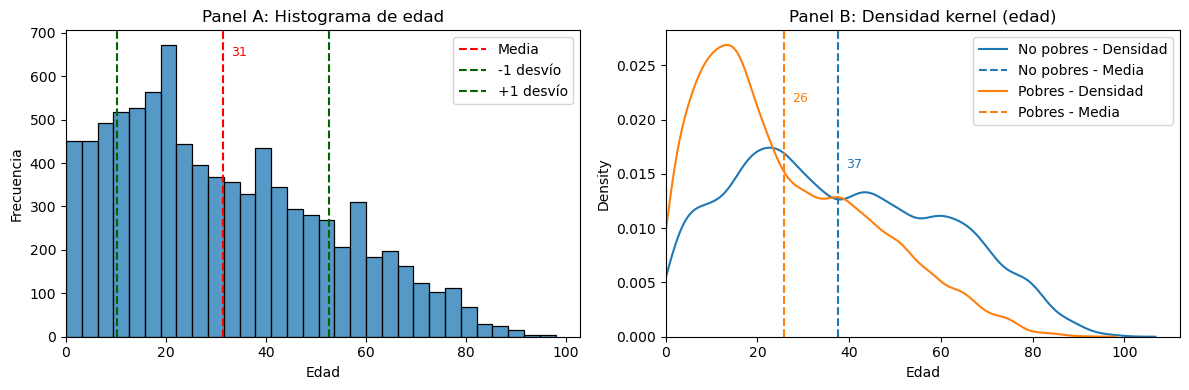

In [36]:
# Elegí el dataframe a graficar
df = respondieron  # o matrizej

# Asegurar tipo numérico
df = df.copy()
df['edad'] = pd.to_numeric(df['edad'], errors='coerce')

fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# ---------- Panel A: Histograma de edad ----------
sns.histplot(df['edad'], bins='auto', ax=axes[0], edgecolor='black')
axes[0].set_title('Panel A: Histograma de edad')
axes[0].set_xlabel('Edad')
axes[0].set_ylabel('Frecuencia')

# Media y ±1σ (totales)
mu = df['edad'].mean()
sd = df['edad'].std(ddof=1)
mu_int = int(round(mu))

axes[0].axvline(mu, color='red', linestyle='--', linewidth=1.5, label='Media')
axes[0].axvline(mu - sd, color='darkgreen', linestyle='--', linewidth=1.5, label='-1 desvío')
axes[0].axvline(mu + sd, color='darkgreen', linestyle='--', linewidth=1.5, label='+1 desvío')
axes[0].set_xlim(left=0)
# Etiqueta horizontal, con pequeño offset para no “tocar” la línea
ymax0 = axes[0].get_ylim()[1]
axes[0].annotate(f'{mu_int}', xy=(mu, ymax0*0.95), xytext=(6, 0),
                 textcoords='offset points', ha='left', va='top', color='red', fontsize=9)
axes[0].legend()

# ---------- Panel B: KDE por pobreza (media con mismo color) ----------
ypos_fracs = [0.90, 0.80]  # alturas relativas para ubicar cada etiqueta y evitar solapado
for i, (valor, etiqueta) in enumerate([(0, 'No pobres'), (1, 'Pobres')]):
    sub = df.loc[df['pobre'] == valor, 'edad'].dropna()
    if len(sub) > 1:
        ax = sns.kdeplot(sub, ax=axes[1], bw_adjust=0.7, clip=(0, None),
                         label=f'{etiqueta} - Densidad')
        color = ax.get_lines()[-1].get_color()
        mu_g = sub.mean()
        mu_g_int = int(round(mu_g))
        # Línea de media con el mismo color
        axes[1].axvline(mu_g, color=color, linestyle='--', linewidth=1.5,
                        label=f'{etiqueta} - Media')
        # Etiqueta horizontal con pequeño offset para no chocar con la línea
        ymax1 = axes[1].get_ylim()[1]
        axes[1].annotate(f'{mu_g_int}', xy=(mu_g, ymax1*ypos_fracs[i]), xytext=(6, 0),
                         textcoords='offset points', ha='left', va='top',
                         color=color, fontsize=9)

axes[1].set_title('Panel B: Densidad kernel (edad)')
axes[1].set_xlabel('Edad')
axes[1].set_xlim(left=0)
axes[1].legend()

plt.tight_layout()
fig.savefig("panel_edad_seaborn.png", dpi=300, bbox_inches="tight")
plt.show()

#### Ejercicio 2:
Cree la variable educ definida como la cantidad de años de educación. Use inteligentemente las variables CH12, CH13 y CH14 para crearla. Por ejemplo, si dice que el nivel más alto de educación es “Secundario” (CH12), “Sí” finalizo este nivel (CH13)  y el último año que aprobó (CH14) fue “sexto”, entonces puede asumir que tiene  educ=12, osea 12 años de educación formal. Presente una estadística descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente

In [37]:
for df in (matrizej,respondieron):
    df[['CH13'] == 9] = np.nan
    df[['CH14'] == 99] = np.nan

In [38]:
# --- 1) Diccionarios de años por nivel ---
# CH12:
# 1 Jardín, 2 Primario, 3 EGB, 4 Secundario, 5 Polimodal,
# 6 Terciario, 7 Universitario, 8 Posgrado, 9 Educación especial

years_before = {
    1: 0,   # Jardín
    2: 0,   # Primario
    3: 0,   # EGB
    4: 6,   # Secundario (asumiendo 6 previos de Primario)
    5: 9,   # Polimodal (después de EGB 9)
    6: 12,  # Terciario
    7: 12,  # Universitario
    8: 17,  # Posgrado
    9: None # Educación especial -> NaN
}

years_in_level = {
    1: 0,   # Jardín
    2: 6,   # Primario
    3: 9,   # EGB
    4: 6,   # Secundario
    5: 3,   # Polimodal
    6: 3,   # Terciario (prom.)
    7: 5,   # Universitario (prom.)
    8: 2,   # Posgrado (prom.)
    9: None # Educación especial
}

def construir_educ(df):
    df = df.copy()

    # Asegurar numérico
    ch12 = pd.to_numeric(df['CH12'], errors='coerce')   # nivel
    ch13 = pd.to_numeric(df['CH13'], errors='coerce')   # finalizó? 1 sí, 2 no (NaN -> no)
    ch14 = pd.to_numeric(df['CH14'], errors='coerce')   # último año aprobado

    # Educación especial en CH14 → NaN
    ch14 = ch14.where(ch14 != 98, np.nan)

    # Mapear años previos y años del nivel
    prev = ch12.map(years_before)
    span = ch12.map(years_in_level)

    # Si el nivel es "educación especial" (prev/span = None) → NaN
    prev = prev.astype('float')
    span = span.astype('float')

    # ¿Finalizó? (1 sí, 2/NaN no)
    finalizo = (ch13 == 1)

    # Años dentro del nivel cursados cuando NO finalizó
    anios_en_nivel = np.minimum(ch14, span)

    # Fórmula
    educ = np.where(
        ch12.isna() | prev.isna() | span.isna(),  # casos no mapeables
        np.nan,
        np.where(
            finalizo,
            prev + span,           # completó el nivel → años totales del nivel
            prev + anios_en_nivel  # no completó → años previos + último año aprobado
        )
    )

    df['educ'] = educ
    return df

# --- 2) Aplicar en ambos dataframes ---
matrizej = construir_educ(matrizej)
respondieron = construir_educ(respondieron)

In [39]:
respondieron['educ'].describe().round()

count    8032.0
mean        9.0
std         5.0
min         0.0
25%         6.0
50%         9.0
75%        12.0
max        19.0
Name: educ, dtype: float64

#### Ejercicio 3:
Actualice la variable ingreso_total_familiar con el total de ingresos habituales (ITF). Recuerde que los pesos de 2005 tienen un poder de compra distinto a los pesos de 2025 en el primer trimestre. Convierta primero los ingresos de 2005 a pesos de 2025. Similar al ítem 1, presente en un panel A, un histograma de la variable ingreso_total_familiar y las distribuciones de kernels para pobres y no pobres en un panel B. Comente brevemente la distribución de ingresos en estos dos panels (3-4 oraciones). En cada panel, sume una linea vertical con la línea de la pobreza calculada en el TP2.

In [40]:
# Ya realizado en los preparativos del DataFrame previo al primer ejercicio, con la adhesión de una nueva columna llamada 'ITF_actual'; que es el ITF de cada observación actualizado al nivel de precios de la canasta de 2025.

for df in (matrizej,respondieron):
    df.copy()
    df['ingreso_total_familiar'] = df['ITF_actual']

In [41]:
# Eliminamos temporalmente los outliers superiores del ITF, para no entorpercer la visualización de datos

for df_name in ("matrizej", "respondieron"):
    tmp = locals()[df_name].copy()
    tmp["ingreso_total_familiar"] = pd.to_numeric(tmp["ingreso_total_familiar"], errors="coerce")
    tmp = tmp[tmp["ingreso_total_familiar"] <= 1e7].copy()
    locals()[df_name] = tmp

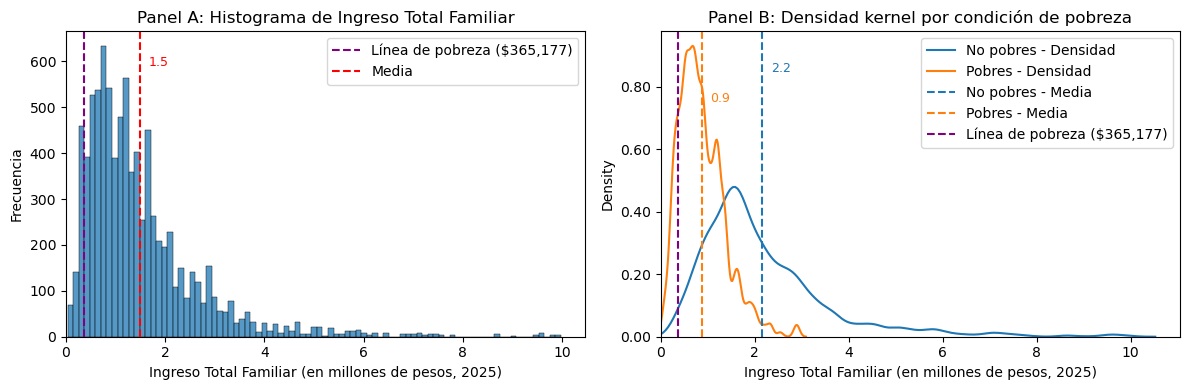

In [56]:
from matplotlib.ticker import FuncFormatter

def plot_ingresos(df, filename='panel_ingresos.png', bw=0.7):
    lp = 365_177             # umbral de pobreza (pesos 2025)
    lp_m = lp / 1_000_000    # umbral en millones

    datos = df.copy()
    datos['ingreso_total_familiar'] = pd.to_numeric(datos['ingreso_total_familiar'], errors='coerce')
    datos['ing_m'] = datos['ingreso_total_familiar'] / 1_000_000  # trabajamos en millones

    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # -------- Panel A: Histograma (en millones) --------
    sns.histplot(datos['ing_m'].dropna(), bins='auto', ax=axes[0], edgecolor='black')
    axes[0].set_title('Panel A: Histograma de Ingreso Total Familiar')
    axes[0].set_xlabel('Ingreso Total Familiar (en millones de pesos, 2025)')
    axes[0].set_ylabel('Frecuencia')
    axes[0].set_xlim(left=0)

    # Línea de pobreza
    axes[0].axvline(lp_m, color='purple', linestyle='--', linewidth=1.5,
                    label=f'Línea de pobreza (${lp:,.0f})')

    # Media global (rojo) + etiqueta con 1 decimal
    mu_global = datos['ing_m'].mean()
    axes[0].axvline(mu_global, color='red', linestyle='--', linewidth=1.5, label='Media')
    ymax0 = axes[0].get_ylim()[1]
    axes[0].annotate(f'{mu_global:.1f}', xy=(mu_global, ymax0*0.92), xytext=(6, 0),
                     textcoords='offset points', ha='left', va='top', color='red', fontsize=9)

    axes[0].legend()

    # -------- Panel B: KDE por pobreza (en millones) --------
    ypos_fracs = [0.90, 0.80]  # alturas relativas para las etiquetas (evita solapado)
    linea_colores = []
    for i, (valor, etiqueta) in enumerate([(0, 'No pobres'), (1, 'Pobres')]):
        sub = datos.loc[datos['pobre'] == valor, 'ing_m'].dropna()
        if len(sub) > 1:
            prev_n = len(axes[1].lines)
            sns.kdeplot(sub, ax=axes[1], bw_adjust=bw, clip=(0, None),
                        label=f'{etiqueta} - Densidad')
            new_line = axes[1].lines[-1] if len(axes[1].lines) > prev_n else None
            color = new_line.get_color() if new_line else None
            linea_colores.append((color, etiqueta, sub.mean()))

    # Dibujar medias por grupo (mismo color que su densidad) + etiquetas con 1 decimal
    for i, (color, etiqueta, mu_g) in enumerate(linea_colores):
        axes[1].axvline(mu_g, color=color, linestyle='--', linewidth=1.5,
                        label=f'{etiqueta} - Media')
        ymax1 = axes[1].get_ylim()[1]
        axes[1].annotate(f'{mu_g:.1f}', xy=(mu_g, ymax1*ypos_fracs[i]), xytext=(6, 0),
                         textcoords='offset points', ha='left', va='top',
                         color=color, fontsize=9)

    # Línea de pobreza en el kernel
    axes[1].axvline(lp_m, color='purple', linestyle='--', linewidth=1.5,
                    label=f'Línea de pobreza (${lp:,.0f})')

    axes[1].set_title('Panel B: Densidad kernel por condición de pobreza')
    axes[1].set_xlabel('Ingreso Total Familiar (en millones de pesos, 2025)')
    axes[1].set_xlim(left=0)
    axes[1].legend()

    # -------- Formatos de ejes --------
    # X: enteros sin decimales (ya en millones)
    entero = FuncFormatter(lambda x, pos: f"{int(round(x))}")
    axes[0].xaxis.set_major_formatter(entero)
    axes[1].xaxis.set_major_formatter(entero)

    # Y (kernel): dos decimales fijos
    axes[1].yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f"{y:.2f}"))

    plt.tight_layout()
    fig.savefig(filename, dpi=300, bbox_inches='tight')
    plt.show()

plot_ingresos(respondieron, filename='panel_ingresos_respondieron.png', bw=0.7)

#### Ejercicio 4:
Para el jefe del hogar, cree la variable horastrab como el total de horas trabajadas como la suma de las horas en la ocupación principal y otras ocupaciones (PP3E_TOT + PP3F_TOT). Presente una estadística descriptiva (promedio, sd, min, p50, max) de dicha variable creada y comente

In [43]:
# 1) Crear 'horastrab' = PP3E_TOT + PP3F_TOT (coerción numérica)
for df_name in ("matrizej", "respondieron"):
    df = locals()[df_name]
    df["PP3E_TOT"] = pd.to_numeric(df["PP3E_TOT"], errors="coerce")
    df["PP3F_TOT"] = pd.to_numeric(df["PP3F_TOT"], errors="coerce")
    df["horastrab"] = df[["PP3E_TOT", "PP3F_TOT"]].sum(axis=1, min_count=1)

# 2) Descriptiva SOLO para jefes de hogar (CH03 == 1):
stats = respondieron.loc[respondieron["CH03"] == 1, "horastrab"].describe().round()
print(stats)
print()

count    2062.0
mean       31.0
std        25.0
min         0.0
25%         0.0
50%        33.0
75%        48.0
max       112.0
Name: horastrab, dtype: float64



#### Ejercicio 5:
¿Cuál es el tamaño de la de la base de datos para su región con las variables originales unificadas? Para ello complete la tabla 1 que se le diseña abajo y comente.

In [44]:
respondieron.drop(columns = [False], inplace = True)
matrizej.drop(columns = [False], inplace = True)

In [45]:
# Resumen por año para el DF 'respondieron'
d = respondieron.copy()
d["ANO4"] = pd.to_numeric(d["ANO4"], errors="coerce").astype("Int64")
d["_p"]  = pd.to_numeric(d["pobre"], errors="coerce")  # 1/0/NaN

g = d.groupby("ANO4", dropna=False)

res_respondieron = pd.DataFrame({
    "Cantidad observaciones": g.size(),
    'NAs en "pobre"': g["_p"].apply(lambda s: s.isna().sum()),
    "Cantidad de Pobres (pobre=1)": g["_p"].apply(lambda s: (s == 1).sum()),
    "Cantidad de No Pobres (pobre=0)": g["_p"].apply(lambda s: (s == 0).sum()),
})

# Mismo número de columnas para cada año
res_respondieron["Cantidad de variables (columnas)"] = d.shape[1]

# Tipos enteros (permitiendo NaN)
for c in res_respondieron.columns:
    res_respondieron[c] = pd.to_numeric(res_respondieron[c], errors="coerce").astype("Int64")

# (Opcional) Ordenar índice por años específicos si existen
orden = [2005, 2025]
res_respondieron = res_respondieron.reindex([y for y in orden if y in res_respondieron.index], fill_value=pd.NA)

res_respondieron

,Cantidad observaciones,"NAs en ""pobre""",Cantidad de Pobres (pobre=1),Cantidad de No Pobres (pobre=0),Cantidad de variables (columnas)
ANO4,,,,,
2005,5406,0,2867,2539,34
2025,3340,0,1637,1703,34


In [47]:
print(matrizej.columns)

Index(['CODUSU', 'ANO4', 'CH03', 'CH04', 'edad', 'CH07', 'CH08', 'NIVEL_ED',
       'CH12', 'CH13', 'CH14', 'ESTADO', 'CAT_INAC', 'IPCF', 'ITF', 'PP3E_TOT',
       'PP3F_TOT', 'CAT_OCUP', 'PP06E', 'PP04G', 'PP03I', 'PP07K', 'P21',
       'T_VI', 'adulto_equiv', 'ad_equiv_hogar', 'ITF_actual',
       'ingreso_necesario', 'pobre', 'edad2', 'educ', 'ingreso_total_familiar',
       'horastrab'],
      dtype='object')


In [48]:
respondieron.to_excel("db_nea_respuestas.xlsx")

### Métodos no supervisados



#### Ejercicio 1:

In [49]:
import numpy as np
import pyreadstat
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering

                            edad     edad2      educ  ingreso_total_familiar  \
edad                    1.000000  0.958537  0.258319                0.058513   
edad2                   0.958537  1.000000  0.117590                0.037703   
educ                    0.258319  0.117590  1.000000                0.227697   
ingreso_total_familiar  0.058513  0.037703  0.227697                1.000000   
IX_TOT                 -0.341285 -0.324404 -0.267910                0.092951   
horastrab               0.280391  0.155142  0.247281                0.065889   

                          IX_TOT  horastrab  
edad                   -0.341285   0.280391  
edad2                  -0.324404   0.155142  
educ                   -0.267910   0.247281  
ingreso_total_familiar  0.092951   0.065889  
IX_TOT                  1.000000  -0.159629  
horastrab              -0.159629   1.000000  


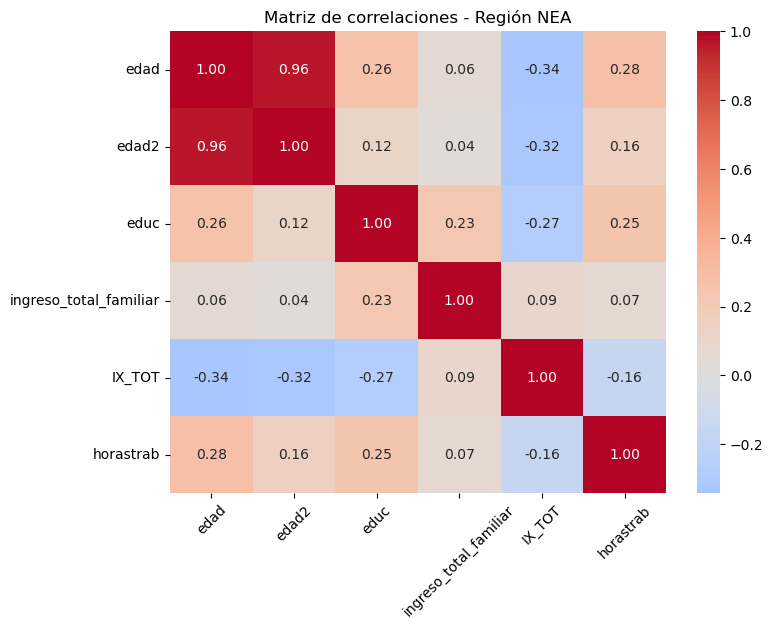

In [51]:
db = respondieron

#usamos las bases de 2005 y 2025 de hogares para conseguir la cantidad de miembros familiares
hogar2005 = pd.read_stata("Hogar_t105.dta")
hogar2025 = pd.read_excel("usu_hogar_T125.xlsx")

#unimos ambas bases y en los casos duplicados dejamos la observación más actualizada
hogar2005 = hogar2005[['CODUSU', 'IX_Tot']]
hogar2005 = hogar2005.rename(columns={'IX_Tot': 'IX_TOT'})
hogar2025 = hogar2025[['CODUSU', 'IX_TOT']]
hogar = pd.concat([hogar2005, hogar2025], ignore_index=True)
hogar = hogar.drop_duplicates(subset=['CODUSU'], keep='last')

#sumamos la variable a la base original
db = db.merge(hogar, on='CODUSU', how='left')


#seleccionamos las variables indicadas
vars_interes = ['edad', 'edad2', 'educ', 'ingreso_total_familiar', 'IX_TOT', 'horastrab']

#calculamos la matriz
corr_matrix = db[vars_interes].corr(method='pearson')
print(corr_matrix)

# visualizamos con un heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de correlaciones - Región NEA')
plt.xticks(rotation=45)
plt.show()


#### Ejercicio 2 y 3:

Loadings:
 [[ 0.51231989  0.46514259  0.40336326  0.1809533  -0.45144425  0.34917441]
 [-0.23659859 -0.28977055  0.39492333  0.80191144  0.20904392  0.1316373 ]
 [-0.34397905 -0.44888763  0.33455748 -0.43247091 -0.31790372  0.5292974 ]
 [ 0.15129194  0.12800041 -0.30854683 -0.02759783  0.57941137  0.7273557 ]
 [ 0.16458241  0.08063513  0.68283572 -0.36886902  0.56175628 -0.22025329]
 [ 0.71641554 -0.68941219 -0.089102    0.01835372 -0.01217775 -0.05509346]]
Loadings del CP1:
 [ 0.51231989  0.46514259  0.40336326  0.1809533  -0.45144425  0.34917441]


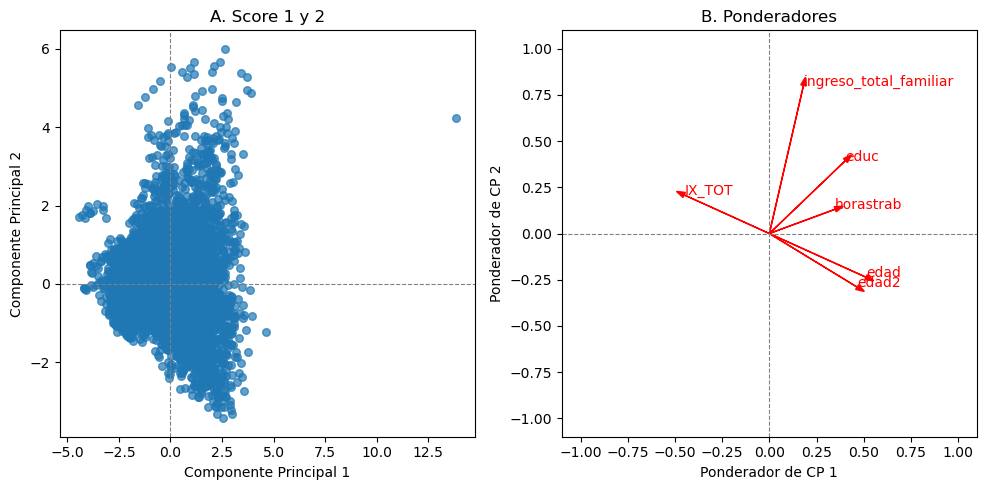

In [52]:
#inicializamos el transformador, 
scaler = StandardScaler(with_std=True, with_mean=True) 

#aplicamos fit_transform al DataFrame
vars_standard = pd.DataFrame(scaler.fit_transform(db[vars_interes]),columns= vars_interes)
vars_standard = vars_standard.dropna()


#aplicamos el método de PCA
pca = PCA()
eph_pca = pca.fit_transform(vars_standard)
eph_pca

loading_vectors = pca.components_ 
print("Loadings:\n", pca.components_)
print("Loadings del CP1:\n",pca.components_[0]) 



#gráfico de dispersion

i, j = 0, 1 # Componentes
fig, (ax_scores, ax_ponderadores) = plt.subplots(1, 2, figsize=(10, 5)) # 1 fila, 2 columnas

# ---
## Panel A. Score 1 y 2
ax_scores.scatter(eph_pca[:,0], eph_pca[:,1], s=30, alpha=0.7) # graficamos los valores de los CP1 y CP2
ax_scores.set_xlabel('Componente Principal %d' % (i+1))
ax_scores.set_ylabel('Componente Principal %d' % (j+1))
ax_scores.set_title('A. Score 1 y 2')

# Líneas punteadas en los ejes
ax_scores.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Eje horizontal en y=0
ax_scores.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Eje vertical en x=0

# ---
## Panel B. Ponderadores
# Líneas punteadas en los ejes
ax_ponderadores.axhline(0, color='gray', linestyle='--', linewidth=0.8) # Eje horizontal en y=0
ax_ponderadores.axvline(0, color='gray', linestyle='--', linewidth=0.8) # Eje vertical en x=0

# ponderadores
for k in range(pca.components_.shape[1]): # loop que itera por la cantidad de features
    ax_ponderadores.arrow(0, 0, pca.components_[i,k], pca.components_[j,k], color ='red', head_width=0.03) # flecha desde el origen (0) a las coordenadas
    ax_ponderadores.text(pca.components_[i,k], pca.components_[j,k], vars_standard.columns[k], color ='red') # al final de cada flecha, nombre de la variable

ax_ponderadores.set_xlabel('Ponderador de CP %d' % (i+1))
ax_ponderadores.set_ylabel('Ponderador de CP %d' % (j+1))
ax_ponderadores.set_title('B. Ponderadores')
ax_ponderadores.set_xlim(-1.1, 1.1)
ax_ponderadores.set_ylim(-1.1, 1.1)

plt.tight_layout() 
plt.show()



#### Ejercicio 4:

[0.35467445 0.21875069 0.17431977 0.15122807 0.09806224 0.00296477]


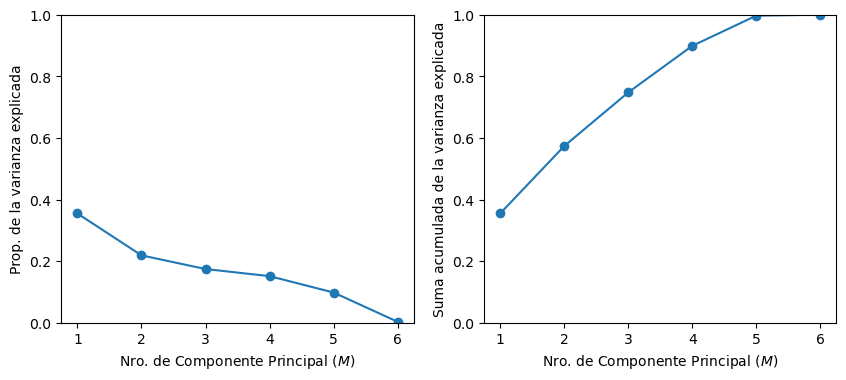

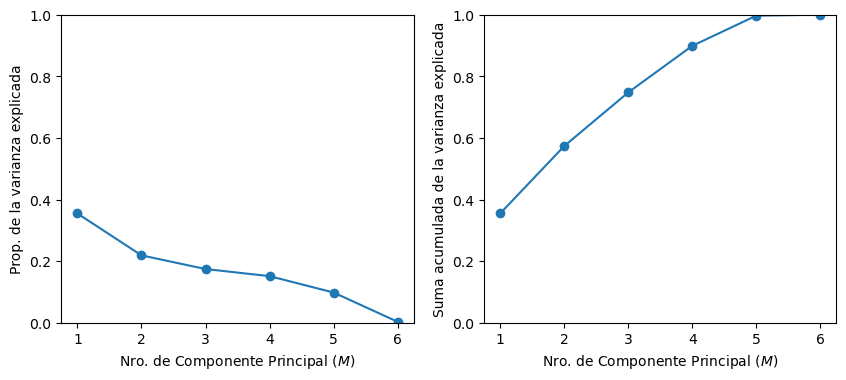

In [53]:
print(pca.explained_variance_ratio_)

#Gráfico de proporción de la varianza
fig, axes = plt.subplots(1, 2, figsize=(10, 4)) # 2 subplots uno al lado del otro
ticks = np.arange(pca.n_components_)+1 # para crear ticks en el eje horizontal
ax = axes[0]
ax.plot(ticks, pca.explained_variance_ratio_ , marker='o')
ax.set_xlabel('Nro. de Componente Principal ($M$)');
ax.set_ylabel('Prop. de la varianza explicada')
ax.set_ylim([0,1])
ax.set_xticks(ticks)
ax = axes[1]
ax.plot(ticks, pca.explained_variance_ratio_.cumsum(), marker='o') 
ax.set_xlabel('Nro. de Componente Principal ($M$)')
ax.set_ylabel('Suma acumulada de la varianza explicada')
ax.set_ylim([0, 1])
ax.set_xticks(ticks)
fig

#### Ejercicio 5:

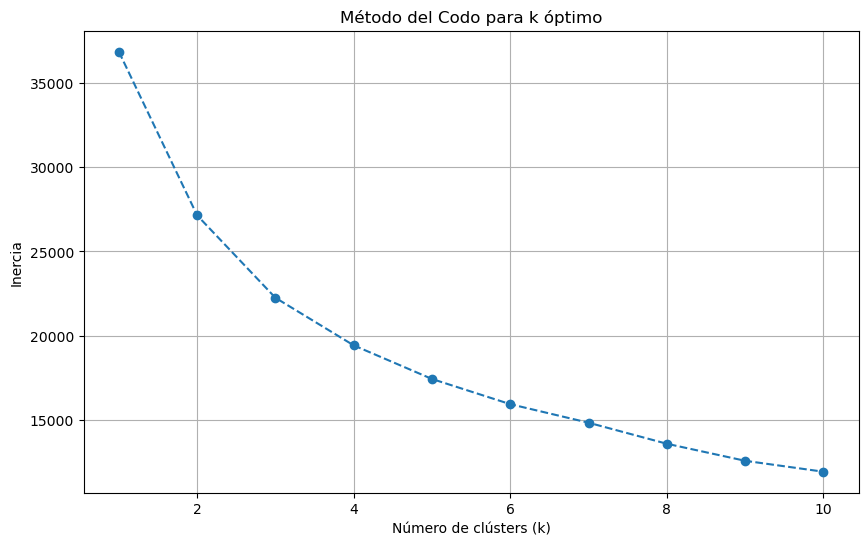

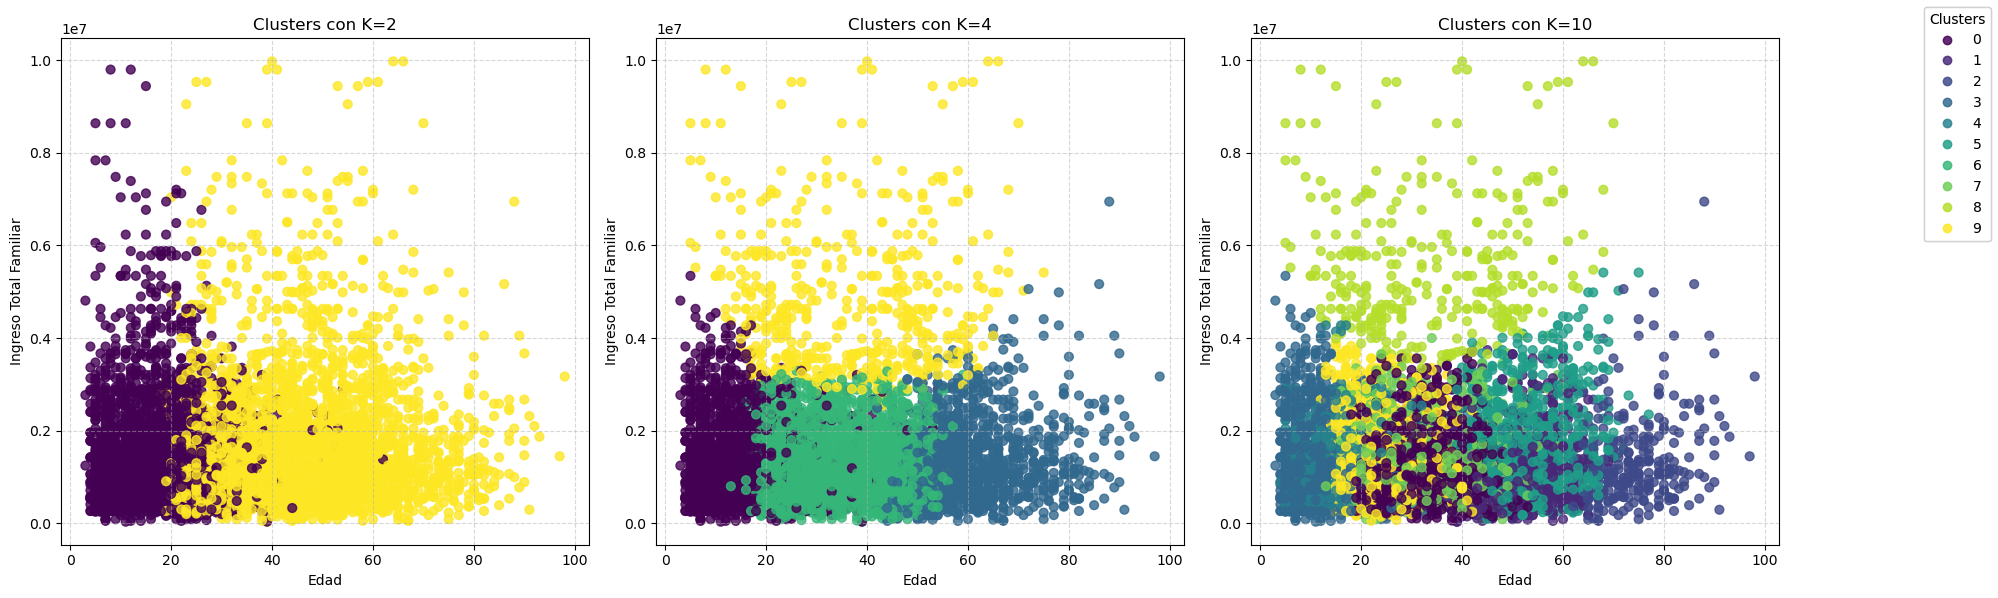

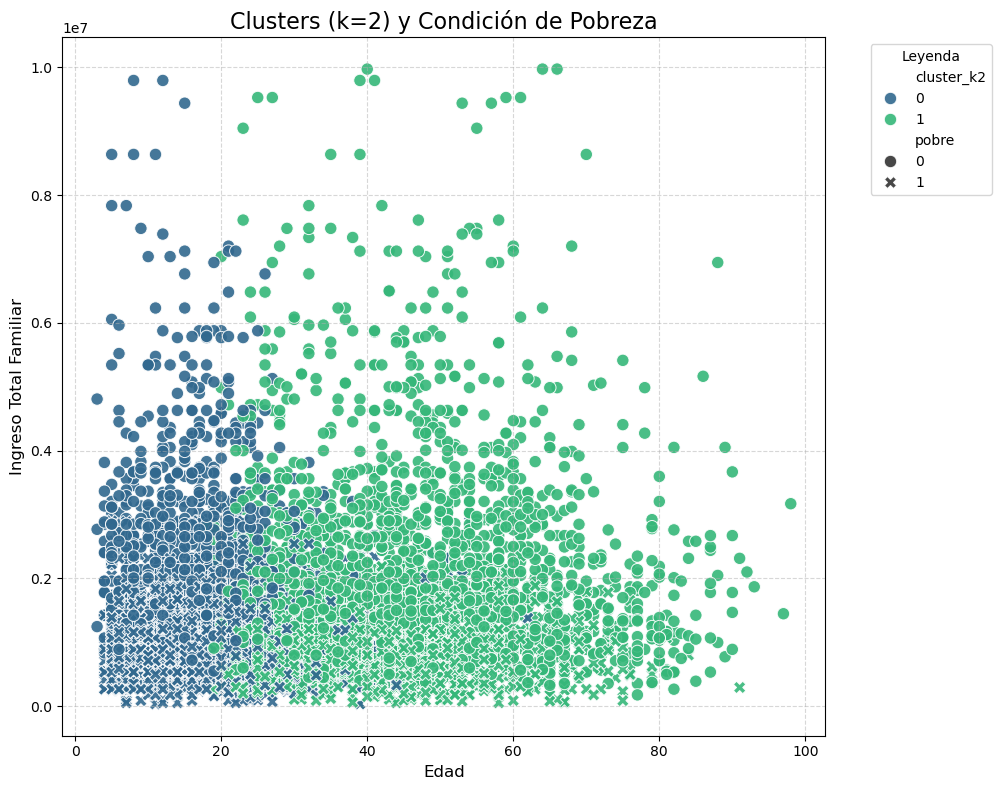

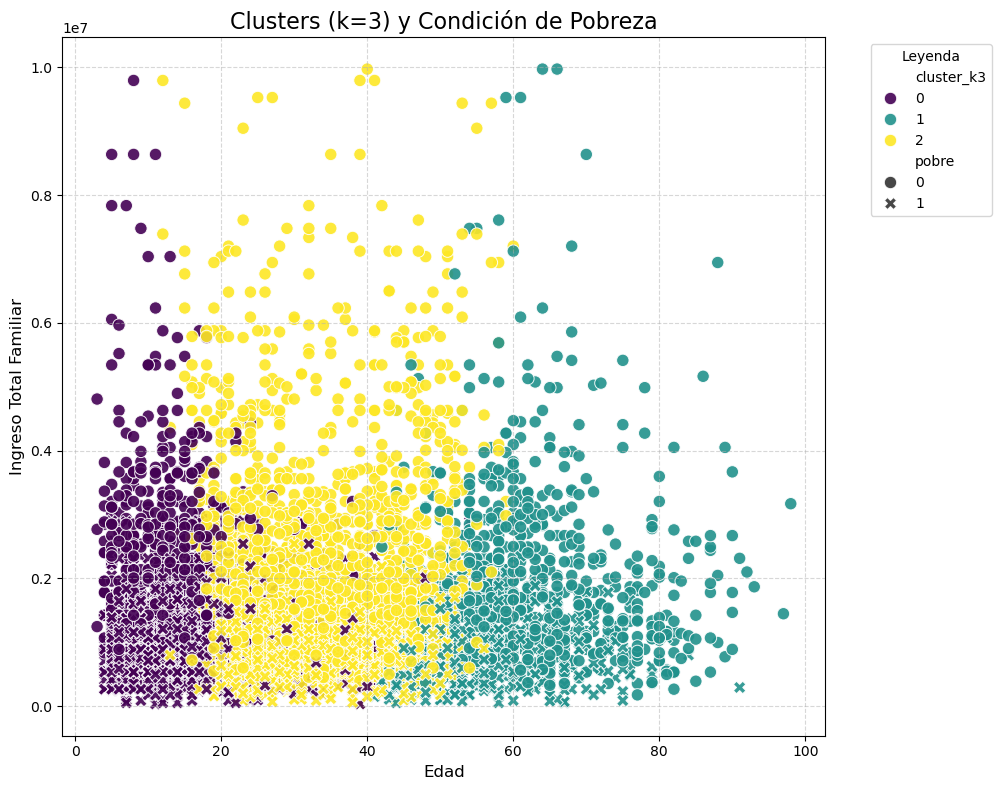

In [54]:
#seleccionamos las variables de interés y eliminamos filas con valores nulos.
vars_cluster_original = db[vars_interes].dropna()

#creamos una copia de la db pero solo con las filas válidas
db_clean = db.loc[vars_cluster_original.index].copy()

#estandarizamos las variables
scaler = StandardScaler(with_std=True, with_mean=True)
X_scaled = scaler.fit_transform(vars_cluster_original)


#aplicamos el metodo de disimilitud para hasta 10 clusters

n_cluster_range = range(1, 11)
inertia_values = []

for n_clusters in n_cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=5, n_init=20)
    kmeans.fit(X_scaled) 
    inertia_values.append(kmeans.inertia_)

#graficamos el método del codo
plt.figure(figsize=(10, 6)) 
plt.plot(n_cluster_range, inertia_values, marker='o', linestyle='--')
plt.xlabel('Número de clústers (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para k óptimo')
plt.grid(True)
plt.show()


#aplicamos el modelo para 2, 4 y 10 clusters
kmeans2 = KMeans(n_clusters=2, random_state=5, n_init=20).fit(X_scaled)
kmeans4 = KMeans(n_clusters=4, random_state=5, n_init=20).fit(X_scaled)
kmeans10 = KMeans(n_clusters=10, random_state=5, n_init=20).fit(X_scaled)

#asignación de los clusters al DataFrame limpio 
#añadimos las etiquetas de los clusters a nuestro DataFrame 'db_clean'
#esto nos permite tener los clusters junto a las variables originales no escaladas
db_clean['cluster_k2'] = kmeans2.labels_
db_clean['cluster_k4'] = kmeans4.labels_
db_clean['cluster_k10'] = kmeans10.labels_



#variables para el gráfico 
x_var = 'edad'
y_var = 'ingreso_total_familiar'

#creamos figura con tres subgráficos
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

#lista con los modelos y sus nombres para iterar
clusters_to_plot = [
    ('K=2', 'cluster_k2'),
    ('K=4', 'cluster_k4'),
    ('K=10', 'cluster_k10')
]

#generamos los gráficos iterando
for ax, (title, col) in zip(axes, clusters_to_plot):
    #graficamos usando los datos de 'db_clean', que tienen los valores originales.
    scatter = ax.scatter(
        db_clean[x_var],
        db_clean[y_var],
        c=db_clean[col],
        cmap='viridis',  
        s=40,
        alpha=0.8
    )
    ax.set_title(f'Clusters con {title}')
    ax.set_xlabel('Edad')
    ax.set_ylabel('Ingreso Total Familiar')
    ax.grid(True, linestyle='--', alpha=0.5)

#añadimos una leyenda general a la figura
legend1 = fig.legend(*scatter.legend_elements(), title="Clusters", loc='upper right')
fig.add_artist(legend1)

plt.tight_layout(rect=[0, 0, 0.9, 1]) 
plt.show()





# variables del gráfico
x_var = 'edad'
y_var = 'ingreso_total_familiar'
cluster_col = 'cluster_k2'
dummy_col = 'pobre'

# --- Crear el gráfico ---
plt.figure(figsize=(12, 8))


sns.scatterplot(
    data=db_clean,
    x=x_var,
    y=y_var,
    hue=cluster_col,
    style=dummy_col,
    palette='viridis', # Mapa de colores para los clusters
    s=80,              # Tamaño de los puntos
    alpha=0.9
)

plt.title('Clusters (k=2) y Condición de Pobreza', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Ingreso Total Familiar', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()



#elegimos k=3 según lo observado gráficamente
optimal_k = 3
kmeans_k3 = KMeans(n_clusters=optimal_k, random_state=5, n_init=20).fit(X_scaled)
db_clean['cluster_k3'] = kmeans_k3.labels_

x_var = 'edad'
y_var = 'ingreso_total_familiar'
cluster_col = 'cluster_k3'
dummy_col = 'pobre'

#graficamos para k=3
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=db_clean,
    x=x_var,
    y=y_var,
    hue=cluster_col,
    style=dummy_col,
    palette='viridis', 
    s=80,              
    alpha=0.9
)

plt.title('Clusters (k=3) y Condición de Pobreza', fontsize=16)
plt.xlabel('Edad', fontsize=12)
plt.ylabel('Ingreso Total Familiar', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Leyenda', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()


#### Ejercicio 6:

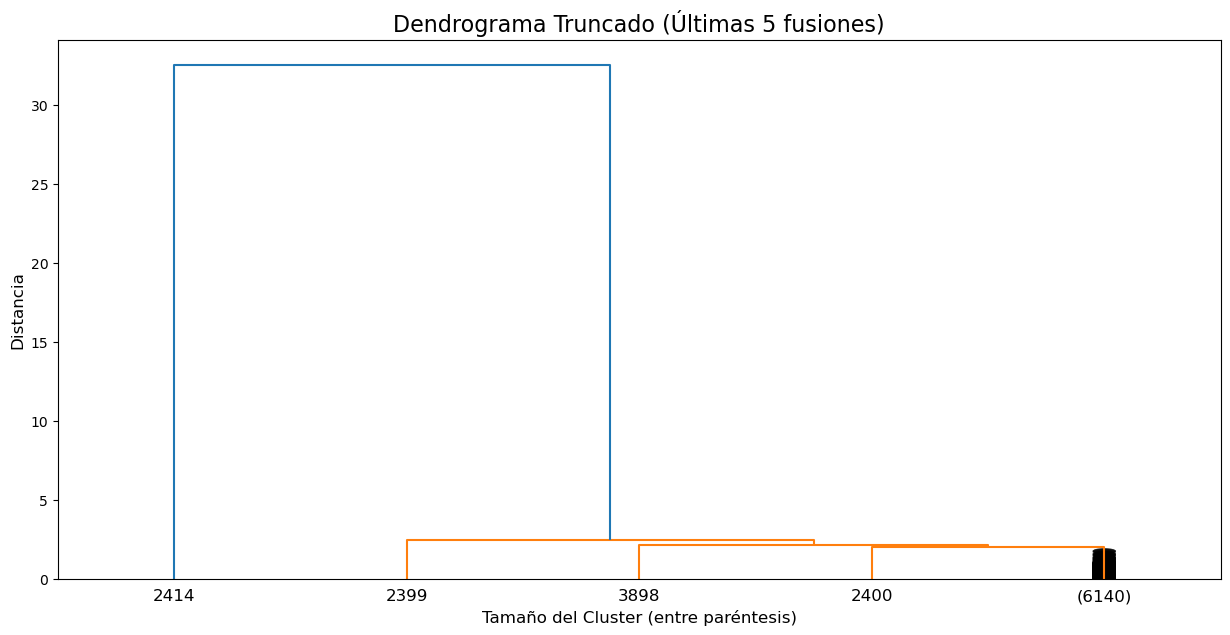

In [55]:
from scipy.cluster.hierarchy import dendrogram, linkage


# --- 2. Calcular la Matriz de Enlace (Linkage Matrix) ---
# Aquí es donde se realiza el clustering jerárquico.
# Usamos el método 'ward' sobre nuestros datos escalados.
Z = linkage(X_scaled, method= "single")


# --- 3. Generar el Dendrograma ---
# Un dendrograma es la visualización de la jerarquía de clusters.
plt.figure(figsize=(15, 7))
plt.title('Dendrograma Truncado (Últimas 5 fusiones)', fontsize=16)
plt.xlabel('Tamaño del Cluster (entre paréntesis)', fontsize=12)
plt.ylabel('Distancia', fontsize=12)

dendrogram(
    Z,
    truncate_mode='lastp',  # Muestra solo las últimas 'p' fusiones
    p=5,                   # El número de fusiones a mostrar
    show_leaf_counts=True,  # Muestra cuántos puntos originales hay en cada hoja
    show_contracted=True,   # Representa las ramas truncadas
)
plt.show()